In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('Iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
df = pd.get_dummies(df, columns=['variety'])
df

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
x = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df[['variety_Setosa', 'variety_Versicolor', 'variety_Virginica']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [12]:
x.shape

(150, 4)

In [13]:
x.shape[1]

4

In [14]:
y.shape

(150, 3)

In [15]:
y.shape[1]

3

## Defining the model structure

In [16]:
model = Sequential()
model.add(Dense(50, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

## Training the model

In [20]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/500
108/108 [==============================] - 1s 7ms/sample - loss: 0.9969 - accuracy: 0.4537 - val_loss: 1.0544 - val_accuracy: 0.3333
Epoch 2/500
108/108 [==============================] - 0s 343us/sample - loss: 0.8796 - accuracy: 0.5370 - val_loss: 1.0122 - val_accuracy: 0.4167
Epoch 3/500
108/108 [==============================] - 0s 306us/sample - loss: 0.8488 - accuracy: 0.5833 - val_loss: 0.9740 - val_accuracy: 0.5833
Epoch 4/500
108/108 [==============================] - 0s 333us/sample - loss: 0.8429 - accuracy: 0.5926 - val_loss: 0.9386 - val_accuracy: 0.6667
Epoch 5/500
108/108 [==============================] - 0s 343us/sample - loss: 0.7790 - accuracy: 0.6852 - val_loss: 0.9054 - val_accuracy: 0.6667
Epoch 6/500
108/108 [==============================] - 0s 306us/sample - loss: 0.7456 - accuracy: 0.6574 - val_loss: 0.8753 - val_accuracy: 0.6667
Epoch 7/500
108/108 [==============================] - 0s 315us/sample - lo

Epoch 56/500
108/108 [==============================] - 0s 296us/sample - loss: 0.3095 - accuracy: 0.8889 - val_loss: 0.4169 - val_accuracy: 0.9167
Epoch 57/500
108/108 [==============================] - 0s 324us/sample - loss: 0.3095 - accuracy: 0.8796 - val_loss: 0.4121 - val_accuracy: 0.9167
Epoch 58/500
108/108 [==============================] - 0s 305us/sample - loss: 0.3201 - accuracy: 0.8704 - val_loss: 0.4071 - val_accuracy: 0.9167
Epoch 59/500
108/108 [==============================] - 0s 343us/sample - loss: 0.2842 - accuracy: 0.8981 - val_loss: 0.4028 - val_accuracy: 0.9167
Epoch 60/500
108/108 [==============================] - 0s 287us/sample - loss: 0.3089 - accuracy: 0.8796 - val_loss: 0.3995 - val_accuracy: 0.9167
Epoch 61/500
108/108 [==============================] - 0s 315us/sample - loss: 0.2809 - accuracy: 0.8796 - val_loss: 0.3966 - val_accuracy: 0.9167
Epoch 62/500
108/108 [==============================] - 0s 315us/sample - loss: 0.2917 - accuracy: 0.8704 - val_

Epoch 111/500
108/108 [==============================] - 0s 296us/sample - loss: 0.1841 - accuracy: 0.9352 - val_loss: 0.2597 - val_accuracy: 0.9167
Epoch 112/500
108/108 [==============================] - 0s 296us/sample - loss: 0.1835 - accuracy: 0.9630 - val_loss: 0.2587 - val_accuracy: 0.9167
Epoch 113/500
108/108 [==============================] - 0s 296us/sample - loss: 0.2036 - accuracy: 0.9167 - val_loss: 0.2553 - val_accuracy: 0.9167
Epoch 114/500
108/108 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 1.00 - 0s 314us/sample - loss: 0.1685 - accuracy: 0.9630 - val_loss: 0.2521 - val_accuracy: 0.9167
Epoch 115/500
108/108 [==============================] - 0s 296us/sample - loss: 0.1531 - accuracy: 0.9722 - val_loss: 0.2500 - val_accuracy: 0.9167
Epoch 116/500
108/108 [==============================] - 0s 306us/sample - loss: 0.1673 - accuracy: 0.9537 - val_loss: 0.2489 - val_accuracy: 0.9167
Epoch 117/500
108/108 [==============================] - 0s 296u

Epoch 166/500
108/108 [==============================] - 0s 305us/sample - loss: 0.1333 - accuracy: 0.9630 - val_loss: 0.1840 - val_accuracy: 0.9167
Epoch 167/500
108/108 [==============================] - 0s 324us/sample - loss: 0.1118 - accuracy: 0.9537 - val_loss: 0.1817 - val_accuracy: 0.9167
Epoch 168/500
108/108 [==============================] - 0s 315us/sample - loss: 0.1288 - accuracy: 0.9630 - val_loss: 0.1800 - val_accuracy: 0.9167
Epoch 169/500
108/108 [==============================] - 0s 306us/sample - loss: 0.1246 - accuracy: 0.9537 - val_loss: 0.1792 - val_accuracy: 0.9167
Epoch 170/500
108/108 [==============================] - 0s 324us/sample - loss: 0.1072 - accuracy: 0.9722 - val_loss: 0.1791 - val_accuracy: 0.9167
Epoch 171/500
108/108 [==============================] - 0s 315us/sample - loss: 0.1339 - accuracy: 0.9444 - val_loss: 0.1769 - val_accuracy: 0.9167
Epoch 172/500
108/108 [==============================] - 0s 315us/sample - loss: 0.1209 - accuracy: 0.9444

Epoch 219/500
108/108 [==============================] - 0s 306us/sample - loss: 0.1078 - accuracy: 0.9537 - val_loss: 0.1669 - val_accuracy: 0.9167
Epoch 220/500
108/108 [==============================] - 0s 315us/sample - loss: 0.0815 - accuracy: 0.9722 - val_loss: 0.1676 - val_accuracy: 0.9167
Epoch 221/500
108/108 [==============================] - 0s 305us/sample - loss: 0.1074 - accuracy: 0.9630 - val_loss: 0.1675 - val_accuracy: 0.9167
Epoch 222/500
108/108 [==============================] - 0s 324us/sample - loss: 0.1093 - accuracy: 0.9537 - val_loss: 0.1669 - val_accuracy: 0.9167
Epoch 223/500
108/108 [==============================] - 0s 333us/sample - loss: 0.0922 - accuracy: 0.9630 - val_loss: 0.1664 - val_accuracy: 0.9167
Epoch 224/500
108/108 [==============================] - 0s 306us/sample - loss: 0.0835 - accuracy: 0.9815 - val_loss: 0.1656 - val_accuracy: 0.9167
Epoch 225/500
108/108 [==============================] - 0s 315us/sample - loss: 0.1002 - accuracy: 0.9630

Epoch 269/500
108/108 [==============================] - 0s 306us/sample - loss: 0.1022 - accuracy: 0.9537 - val_loss: 0.1608 - val_accuracy: 0.9167
Epoch 270/500
108/108 [==============================] - 0s 324us/sample - loss: 0.0869 - accuracy: 0.9815 - val_loss: 0.1607 - val_accuracy: 0.9167
Epoch 271/500
108/108 [==============================] - 0s 287us/sample - loss: 0.1119 - accuracy: 0.9352 - val_loss: 0.1606 - val_accuracy: 0.9167
Epoch 272/500
108/108 [==============================] - 0s 315us/sample - loss: 0.0850 - accuracy: 0.9630 - val_loss: 0.1602 - val_accuracy: 0.9167
Epoch 273/500
108/108 [==============================] - 0s 315us/sample - loss: 0.0924 - accuracy: 0.9630 - val_loss: 0.1601 - val_accuracy: 0.9167
Epoch 274/500
108/108 [==============================] - 0s 306us/sample - loss: 0.0974 - accuracy: 0.9630 - val_loss: 0.1600 - val_accuracy: 0.9167
Epoch 275/500
108/108 [==============================] - 0s 315us/sample - loss: 0.0906 - accuracy: 0.9630

108/108 [==============================] - 0s 315us/sample - loss: 0.0906 - accuracy: 0.9630 - val_loss: 0.1578 - val_accuracy: 0.9167
Epoch 322/500
108/108 [==============================] - 0s 306us/sample - loss: 0.0799 - accuracy: 0.9537 - val_loss: 0.1578 - val_accuracy: 0.9167
Epoch 323/500
108/108 [==============================] - 0s 324us/sample - loss: 0.0848 - accuracy: 0.9907 - val_loss: 0.1577 - val_accuracy: 0.9167
Epoch 324/500
108/108 [==============================] - 0s 343us/sample - loss: 0.1024 - accuracy: 0.9444 - val_loss: 0.1577 - val_accuracy: 0.9167
Epoch 325/500
108/108 [==============================] - 0s 315us/sample - loss: 0.0876 - accuracy: 0.9815 - val_loss: 0.1577 - val_accuracy: 0.9167
Epoch 326/500
 32/108 [=======>......................] - ETA: 0s - loss: 0.1040 - accuracy: 0.9062
Epoch 00326: ReduceLROnPlateau reducing learning rate to 4.223513315082528e-05.
108/108 [==============================] - 0s 306us/sample - loss: 0.0975 - accuracy: 0.93

108/108 [==============================] - 0s 361us/sample - loss: 0.0868 - accuracy: 0.9722 - val_loss: 0.1578 - val_accuracy: 0.9167
Epoch 371/500
108/108 [==============================] - 0s 315us/sample - loss: 0.0866 - accuracy: 0.9907 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 372/500
108/108 [==============================] - 0s 343us/sample - loss: 0.0855 - accuracy: 0.9722 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 373/500
108/108 [==============================] - 0s 324us/sample - loss: 0.0885 - accuracy: 0.9537 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 374/500
108/108 [==============================] - 0s 333us/sample - loss: 0.0861 - accuracy: 0.9722 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 375/500
108/108 [==============================] - 0s 334us/sample - loss: 0.0985 - accuracy: 0.9630 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 376/500
 32/108 [=======>......................] - ETA: 0s - loss: 0.0709 - accuracy: 0.9688
Epoch 00376: ReduceLR

## Testing & evaluating the model

In [21]:
y_pred = model.predict_classes(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [22]:
y_test

,variety_Setosa,variety_Versicolor,variety_Virginica
73,0,1,0
18,1,0,0
118,0,0,1
78,0,1,0
76,0,1,0
31,1,0,0
64,0,1,0
141,0,0,1
68,0,1,0
82,0,1,0


In [23]:
model.predict_classes(x_test)[10]

2

In [24]:
y_test.iloc[10]

variety_Setosa        0
variety_Versicolor    0
variety_Virginica     1
Name: 110, dtype: uint8

In [25]:
model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 165us/sample - loss: 0.0625 - accuracy: 1.0000


[0.062482334673404694, 1.0]

## Visualize Loss

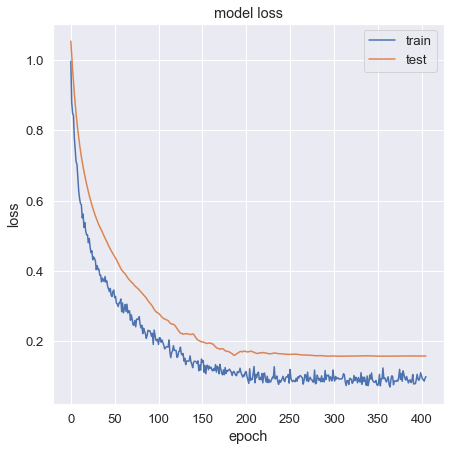

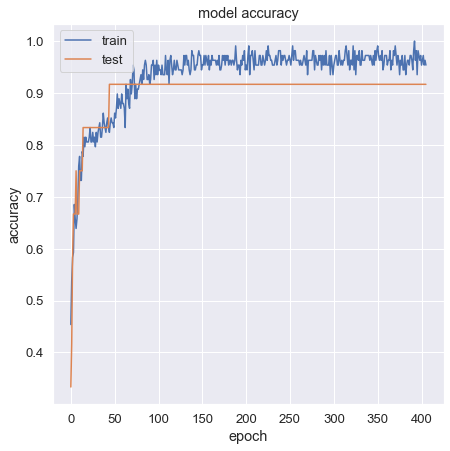

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [27]:
model.save('model.h5')

In [28]:
import joblib

In [29]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

## Loding Model

In [30]:
sc = joblib.load('scaler.pkl')

In [31]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.predict_classes(sc.transform([[5, 4, 2, 4]]))

array([2], dtype=int64)

# Great Work!